# Prepare final dataframe

**Procedure:**
1. Filter for students who participated in BOTH the fall trait survey AND the spring well-being/network survey.
1. Create a composite fall well-being measure from SWLS, Subjective Happiness, PSS, Loneliness, Anxiety, CESD
  * Spring well-being composite already exists, which is an average of ~15 questions about happiness, anxiety, stress, loneliness, etc (see below).
1. Standardize fall and spring well-being measures to 0 mean and unit variance.
1. Handle categorical and special columns (e.g. parental education, family income).

**(Reference): Spring well-being measure:**
1. I feel connected to my friends and family. (Wellbeing_self_17) 
1. I feel lonely. (Lonely) 
1. I feel stressed. (Stressed) 
1. I feel satisfied with my life. (Satisfied) 
1. I dwell on my negative feelings or problems. (Rumination) 
1. I feel that there were people I could talk to. (Wellbeing_self_18) 
1. I feel afraid or uncomfortable doing things (like speaking, eating, or writing) in front of other people. (Social_Anxiety) 
1. I feel content. (Wellbeing_self_22) 
1. I feel nervous or anxious. (Anxiety_1) 
1. I worry a lot about bad things that might happen. (Anxiety_2) 
1. I feel confident about my ability to handle my personal problems. (Wellbeing_self_19) 
1. I feel depressed or down. (Depression) 
1. I lack interest or pleasure in things I usually enjoy. (Anhedonia) 
1. I feel hopeful about the future. (Wellbeing_self_21) 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configure" data-toc-modified-id="Configure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configure</a></span></li><li><span><a href="#Import-and-load" data-toc-modified-id="Import-and-load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and load</a></span></li><li><span><a href="#Glance-at-the-available-columns" data-toc-modified-id="Glance-at-the-available-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Glance at the available columns</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Remove-columns-we-don't-need" data-toc-modified-id="Remove-columns-we-don't-need-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Remove columns we don't need</a></span></li><li><span><a href="#Restrict-to-students-who-completed-both-the-trait-and-spring-wb-surveys" data-toc-modified-id="Restrict-to-students-who-completed-both-the-trait-and-spring-wb-surveys-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Restrict to students who completed both the <code>trait</code> and spring <code>wb</code> surveys</a></span></li><li><span><a href="#Create-fall-composite-well-being-score,-averaging-several-normalized-wb-related-columns" data-toc-modified-id="Create-fall-composite-well-being-score,-averaging-several-normalized-wb-related-columns-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create fall composite well-being score, averaging several normalized wb-related columns</a></span></li><li><span><a href="#Standardize-spring-well-being-scores" data-toc-modified-id="Standardize-spring-well-being-scores-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Standardize spring well-being scores</a></span></li><li><span><a href="#Sanity-checks,-and-glance-at-well-being-change" data-toc-modified-id="Sanity-checks,-and-glance-at-well-being-change-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Sanity checks, and glance at well-being change</a></span><ul class="toc-item"><li><span><a href="#Drop-well-being-change-columns,-let-the-models-figure-out-if-it-matters" data-toc-modified-id="Drop-well-being-change-columns,-let-the-models-figure-out-if-it-matters-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Drop well-being-change columns, let the models figure out if it matters</a></span></li></ul></li></ul></li><li><span><a href="#Manually-adjust-demographic-columns" data-toc-modified-id="Manually-adjust-demographic-columns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Manually adjust demographic columns</a></span><ul class="toc-item"><li><span><a href="#Remove-demographic-like-columns-that-we-don't-want-to-use-in-our-models" data-toc-modified-id="Remove-demographic-like-columns-that-we-don't-want-to-use-in-our-models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Remove demographic-like columns that we don't want to use in our models</a></span></li><li><span><a href="#Make-parental-education-numeric/cardinal" data-toc-modified-id="Make-parental-education-numeric/cardinal-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Make parental education numeric/cardinal</a></span></li><li><span><a href="#Make-income-numeric/cardinal" data-toc-modified-id="Make-income-numeric/cardinal-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Make income numeric/cardinal</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Financial-aid" data-toc-modified-id="Financial-aid-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Financial aid</a></span></li><li><span><a href="#Race" data-toc-modified-id="Race-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Race</a></span></li></ul></li><li><span><a href="#Impute-the-(small-amount-of)-missing-data" data-toc-modified-id="Impute-the-(small-amount-of)-missing-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Impute the (small amount of) missing data</a></span><ul class="toc-item"><li><span><a href="#How-much-data-is-missing?-(A:-Not-much)" data-toc-modified-id="How-much-data-is-missing?-(A:-Not-much)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>How much data is missing? (A: Not much)</a></span></li></ul></li></ul></div>

## Configure

In [1]:
MERGED_DATAFILE = '../data/2018-2019/postprocessed/merged.csv'
FINAL_DATAFILE = '../data/2018-2019/postprocessed/final_for_analysis.csv'
PLOT_DIR = '../data/2018-2019/plots/'

## Import and load

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

# Plot directly in notebook
# NOTE: break this command into it's own cell, and run
# it BEFORE everything below it. Unfortunately that's
# the only way to get the plot settings to stick.
%matplotlib inline

Everett Wetchler 2020-01-20 09:17:48 PST 

CPython 3.6.5
IPython 7.8.0

numpy 1.17.3
pandas 0.25.1
matplotlib 3.1.0
seaborn 0.9.0
watermark 2.0.1


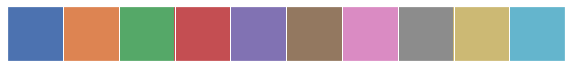

In [3]:
import datetime as dt
import os
import random
import re
import simplejson as json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

# Customize default chart graphics
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# It's useful to have some named colors handy
(SNS_BLUE, SNS_ORANGE, SNS_GREEN,
 SNS_RED, SNS_PURPLE, SNS_BROWN,
 SNS_PINK, SNS_GRAY, SNS_YELLOW,
 SNS_CYAN) = sns.color_palette()
sns.palplot(sns.color_palette())

# Watermark extension to print version/system information
# Flags:
# -a [author] --v (python/ipython versions) -d (date)
# -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version)
# -p [packages] (package info)
%load_ext watermark
%watermark -a 'Everett Wetchler' -v -d -t -z -w -p numpy,pandas,matplotlib,seaborn

####################################################
# END Boilerplate
####################################################

In [4]:
df = pd.read_csv(MERGED_DATAFILE)
assert len(df) == len(set(df['PID'])), "Found duplicate PIDs!"
df.set_index('PID', inplace=True)
print(df.shape)
df.head()

(1047, 97)


,NID,Extraversion_prefrosh,BAS_prefrosh,NTB_prefrosh,EC_prefrosh,PD_prefrosh,PT_prefrosh,Prosociality_prefrosh,Loneliness_prefrosh,Loneliness_R_prefrosh,PSS_prefrosh,PSS_R_prefrosh,Subj_Happiness_prefrosh,SWL_prefrosh,MalleableEmpathy_prefrosh,EMPATHY_prefrosh,POSITIVITY_prefrosh,NEGATIVITY_prefrosh,LIFE_SATISFACTION_prefrosh,Age_trait,Gender_trait,Race_trait,Major_trait,Rlgn_trait,FinclAid_trait,Born_trait,YearsUS_trait,CtznStatus_trait,Siblings_trait,FatherEd_trait,MotherEd_trait,FmlyIncome_trait,FmlyStatus_trait,Extraversion_trait,Agreeableness_trait,Openness_trait,Conscientiousness_trait,NPI_trait,Positive_empathy_trait,Pos_efficacy_trait,Neg_efficacy_trait,Pos_tendency_trait,Neg_Tendency_trait,CESD_trait,STAI_Anxiety_trait,Need_Belong_trait,Prosociality_trait,Loneliness_trait,PSS_trait,SubjHappiness_trait,SWLS_trait,Emp_theory_trait,RS_1_trait,RS_2_trait,Self_Esteem_trait,Self_monitor_trait,Distress_Disclosure_trait,Guidance_trait,Warmth_trait,Integration_trait,Attachment_trait,Nurturance_trait,Reliable_trait,Anticipated_Risks_trait,Anticipated_Benefits_trait,PI_trait,SI_trait,CI_trait,BFNE_trait,BAS_drive_trait,BAS_Fun_seeking_trait,BAS_Fun_Reward_responsiveness_trait,Suppression_trait,Cogntive_Reappraisal_trait,Extensic_improve_trait,Extensic_worse_trait,Intrinsic_imrpove_trait,Intrinsic_worse_trait,Empathic_Concern_trait,Perspective_Taking_trait,Personal_Distress_trait,Wellbeing_self_17_wb,Lonely_wb,Stressed_wb,Satisfied_wb,Rumination_wb,Wellbeing_self_18_wb,Social_Anxiety_wb,Wellbeing_self_22_wb,Anxiety_1_wb,Anxiety_2_wb,Wellbeing_self_19_wb,Depression_wb,Anhedonia_wb,Wellbeing_self_21_wb,Belonging_wb,Wellbeing_wb
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UPl0A7hyV0,NaN,1.000,1.769231,2.1,3.00,1.50,3.00,3.166667,1.750,2.250,1.00,3.00,4.00,3.8,4.000000,3.291667,1.384615,1.800,3.26250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra1xsp248Q,NaN,1.875,2.461538,3.0,3.75,1.25,2.75,3.833333,1.875,2.125,2.50,1.50,2.75,4.4,3.333333,3.416667,2.168269,2.125,2.69375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IqidLJtjxg,11.0,2.875,2.461538,1.8,3.25,2.00,3.00,3.250000,1.000,3.000,0.25,3.75,5.00,5.2,2.000000,2.875000,2.668269,1.900,4.23750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR9ggA8Ajc,9.0,3.375,2.461538,2.4,2.25,1.00,1.75,2.750000,0.750,3.250,1.50,2.50,4.75,6.0,4.333333,2.770833,2.918269,1.700,4.12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.714286
vgxlTMkQs5,7.0,1.250,1.769231,3.4,3.00,1.25,3.00,2.833333,2.750,1.250,2.50,1.50,1.25,3.0,2.000000,2.708333,1.509615,2.325,1.75000,18.0,1.0,White or Caucasian,English,None,No,1.0,18.0,United States citizen,3.0,"Professional Degree (MD, JD, etc.)","Professional Degree (MD, JD, etc.)","$75,000 - $99,999",8.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,1.9,3.526316,3.8,2.666667,2.375,3.25,1.75,3.2,3.0,4.75,4.0,3.1,19.0,2.785714,2.5,3.5,2.5,2.0,2.75,2.5,4.75,4.0,4.

## Glance at the available columns

In [5]:
print("Prefrosh:")
[c for c in df.columns if c.endswith('_prefrosh')]

Prefrosh:


['Extraversion_prefrosh',
 'BAS_prefrosh',
 'NTB_prefrosh',
 'EC_prefrosh',
 'PD_prefrosh',
 'PT_prefrosh',
 'Prosociality_prefrosh',
 'Loneliness_prefrosh',
 'Loneliness_R_prefrosh',
 'PSS_prefrosh',
 'PSS_R_prefrosh',
 'Subj_Happiness_prefrosh',
 'SWL_prefrosh',
 'MalleableEmpathy_prefrosh',
 'EMPATHY_prefrosh',
 'POSITIVITY_prefrosh',
 'NEGATIVITY_prefrosh',
 'LIFE_SATISFACTION_prefrosh']

In [6]:
print("Trait:")
[c for c in df.columns if c.endswith('_trait')]

Trait:


['Age_trait',
 'Gender_trait',
 'Race_trait',
 'Major_trait',
 'Rlgn_trait',
 'FinclAid_trait',
 'Born_trait',
 'YearsUS_trait',
 'CtznStatus_trait',
 'Siblings_trait',
 'FatherEd_trait',
 'MotherEd_trait',
 'FmlyIncome_trait',
 'FmlyStatus_trait',
 'Extraversion_trait',
 'Agreeableness_trait',
 'Openness_trait',
 'Conscientiousness_trait',
 'NPI_trait',
 'Positive_empathy_trait',
 'Pos_efficacy_trait',
 'Neg_efficacy_trait',
 'Pos_tendency_trait',
 'Neg_Tendency_trait',
 'CESD_trait',
 'STAI_Anxiety_trait',
 'Need_Belong_trait',
 'Prosociality_trait',
 'Loneliness_trait',
 'PSS_trait',
 'SubjHappiness_trait',
 'SWLS_trait',
 'Emp_theory_trait',
 'RS_1_trait',
 'RS_2_trait',
 'Self_Esteem_trait',
 'Self_monitor_trait',
 'Distress_Disclosure_trait',
 'Guidance_trait',
 'Warmth_trait',
 'Integration_trait',
 'Attachment_trait',
 'Nurturance_trait',
 'Reliable_trait',
 'Anticipated_Risks_trait',
 'Anticipated_Benefits_trait',
 'PI_trait',
 'SI_trait',
 'CI_trait',
 'BFNE_trait',
 'BAS_dri

In [7]:
print("Spring well-being:")
[c for c in df.columns if c.endswith('_wb')]

Spring well-being:


['Wellbeing_self_17_wb',
 'Lonely_wb',
 'Stressed_wb',
 'Satisfied_wb',
 'Rumination_wb',
 'Wellbeing_self_18_wb',
 'Social_Anxiety_wb',
 'Wellbeing_self_22_wb',
 'Anxiety_1_wb',
 'Anxiety_2_wb',
 'Wellbeing_self_19_wb',
 'Depression_wb',
 'Anhedonia_wb',
 'Wellbeing_self_21_wb',
 'Belonging_wb',
 'Wellbeing_wb']

## Data Preparation

### Remove columns we don't need

In [8]:
# Drop all prefrosh columns
df = df[[c for c in df if not c.endswith('_prefrosh')]]
# Drop all spring-wellbeing columns except the composite
df = df.drop(columns=[c for c in df.columns if c.endswith('_wb') and c != 'Wellbeing_wb'])
print(df.shape)
df.head()

(1047, 64)


,NID,Age_trait,Gender_trait,Race_trait,Major_trait,Rlgn_trait,FinclAid_trait,Born_trait,YearsUS_trait,CtznStatus_trait,Siblings_trait,FatherEd_trait,MotherEd_trait,FmlyIncome_trait,FmlyStatus_trait,Extraversion_trait,Agreeableness_trait,Openness_trait,Conscientiousness_trait,NPI_trait,Positive_empathy_trait,Pos_efficacy_trait,Neg_efficacy_trait,Pos_tendency_trait,Neg_Tendency_trait,CESD_trait,STAI_Anxiety_trait,Need_Belong_trait,Prosociality_trait,Loneliness_trait,PSS_trait,SubjHappiness_trait,SWLS_trait,Emp_theory_trait,RS_1_trait,RS_2_trait,Self_Esteem_trait,Self_monitor_trait,Distress_Disclosure_trait,Guidance_trait,Warmth_trait,Integration_trait,Attachment_trait,Nurturance_trait,Reliable_trait,Anticipated_Risks_trait,Anticipated_Benefits_trait,PI_trait,SI_trait,CI_trait,BFNE_trait,BAS_drive_trait,BAS_Fun_seeking_trait,BAS_Fun_Reward_responsiveness_trait,Suppression_trait,Cogntive_Reappraisal_trait,Extensic_improve_trait,Extensic_worse_trait,Intrinsic_imrpove_trait,Intrinsic_worse_trait,Empathic_Concern_trait,Perspective_Taking_trait,Personal_Distress_trait,Wellbeing_wb
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UPl0A7hyV0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra1xsp248Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IqidLJtjxg,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GR9ggA8Ajc,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.714286
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,English,None,No,1.0,18.0,United States citizen,3.0,"Professional Degree (MD, JD, etc.)","Professional Degree (MD, JD, etc.)","$75,000 - $99,999",8.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,1.9,3.526316,3.8,2.666667,2.375,3.25,1.75,3.2,3.0,4.75,4.0,3.1,19.0,2.785714,2.5,3.5,2.5,2.0,2.75,2.5,4.75,4.0,4.0,3.25,1.375,3.857143,2.25,2.0,3.2,6.0,3.166667,4.833333,1.0,2.0,4.5,2.166667,1.857143,1.428571,1.928571


### Restrict to students who completed both the `trait` and spring `wb` surveys

Also delete the prefrosh data altogether, for this analysis

In [9]:
trait_cols = [c for c in df.columns if c.endswith('_trait')]
print("Non-null values in trait surveys")
trait_notnull = df[trait_cols].notnull().sum(axis=1)
trait_notnull.value_counts().sort_index()

Non-null values in trait surveys


0     732
55      1
57      1
58      3
60      3
61      6
62    301
dtype: int64

In [10]:
wb_cols = [c for c in df.columns if c.endswith('_wb')]
print("Non-null values in spring WB survey")
wb_notnull = df[wb_cols].notnull().sum(axis=1)
wb_notnull.value_counts().sort_index()

Non-null values in spring WB survey


0    533
1    514
dtype: int64

In [11]:
complete = (trait_notnull > 0) & (wb_notnull > 0)
print(complete.value_counts())

False    843
True     204
dtype: int64


In [12]:
df = df[complete]
df = df[[c for c in df.columns if not c.endswith('_prefrosh')]]
new_colnames = []
for c in df.columns:
    if c.endswith('_trait'):
        new_colnames.append(c[:-6])
    elif c == 'Wellbeing_wb':
        new_colnames.append('Wellbeing_spring')
    else:
        new_colnames.append(c)
df.columns = new_colnames
print(df.shape)
df.head()

(204, 64)


,NID,Age,Gender,Race,Major,Rlgn,FinclAid,Born,YearsUS,CtznStatus,Siblings,FatherEd,MotherEd,FmlyIncome,FmlyStatus,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,CESD,STAI_Anxiety,Need_Belong,Prosociality,Loneliness,PSS,SubjHappiness,SWLS,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,English,None,No,1.0,18.0,United States citizen,3.0,"Professional Degree (MD, JD, etc.)","Professional Degree (MD, JD, etc.)","$75,000 - $99,999",8.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,1.9,3.526316,3.8,2.666667,2.375,3.25,1.75,3.2,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,1.928571
M9obKkDvc0,11.0,18.0,2.0,South Asian,cs/econ,None,Yes,1.0,6.0,United States citizen,1.0,Master's Degree (MS),Master's Degree (MS),Choose not to disclose,10.0,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,1.2,2.315789,3.8,4.000000,1.750,2.00,5.00,6.0,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,2.500000
RdS4vMvQjo,9.0,18.0,1.0,White or Caucasian,Undecided,None,Yes,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Doctoral Degree (PhD),"$100,000 - $150,000",8.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,0.5,1.473684,3.6,2.750000,1.375,1.00,5.00,6.2,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,3.071429
n08loMfJH7,4.0,18.0,2.0,East Asian,Undecided,None,No,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Vocational/Technical School (2 year),"Over $150,000",9.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,0.3,2.210526,3.6,3.000000,1.000,1.00,4.50,5.4,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,2.928571
8rsekwqjFy,5.0,18.0,1.0,South Asian,undecided,Other,Yes,1.0,18.0,United States citizen,1.0,Vocational/Technical School (2 year),Vocational/Technical School (2 year),"$100,000 - $150,000",7.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,1.0,1.789474,3.7,2.666667,1.250,1.25,5.75,6.0,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,2.500000


In [13]:
len(df), len(set(df.index))

(204, 204)

In [14]:
df['NID'].value_counts().sort_index()

1.0     16
2.0     22
4.0     32
5.0     17
7.0     23
8.0     21
9.0      6
10.0    16
11.0    15
13.0    20
15.0    16
Name: NID, dtype: int64

### Create fall composite well-being score, averaging several normalized wb-related columns

This is intended to roughly correspond to the content of the spring well-being score, as we don't have the exact same survey in the early fall

In [15]:
composite_cols_pos = ['SWLS', 'SubjHappiness']
composite_cols_neg = ['PSS', 'Loneliness', 'STAI_Anxiety', 'CESD']
# Normalize so these are evenly weighted
normed_cols = [(df[c] - df[c].mean()) / df[c].std() for c in composite_cols_pos]
normed_cols.extend([-(df[c] - df[c].mean()) / df[c].std() for c in composite_cols_neg])
fall_wb = pd.DataFrame(normed_cols).T.mean(axis=1)
# Normalize the final composite scale too, as the units have no meaning
fall_wb = (fall_wb - fall_wb.mean()) / fall_wb.std()
df.insert(len(df.columns) - 1, 'Wellbeing_fall', fall_wb)
df = df.drop(columns=composite_cols_pos + composite_cols_neg)
df.head()

,NID,Age,Gender,Race,Major,Rlgn,FinclAid,Born,YearsUS,CtznStatus,Siblings,FatherEd,MotherEd,FmlyIncome,FmlyStatus,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,English,None,No,1.0,18.0,United States citizen,3.0,"Professional Degree (MD, JD, etc.)","Professional Degree (MD, JD, etc.)","$75,000 - $99,999",8.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,1.928571
M9obKkDvc0,11.0,18.0,2.0,South Asian,cs/econ,None,Yes,1.0,6.0,United States citizen,1.0,Master's Degree (MS),Master's Degree (MS),Choose not to disclose,10.0,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,2.500000
RdS4vMvQjo,9.0,18.0,1.0,White or Caucasian,Undecided,None,Yes,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Doctoral Degree (PhD),"$100,000 - $150,000",8.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,3.071429
n08loMfJH7,4.0,18.0,2.0,East Asian,Undecided,None,No,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Vocational/Technical School (2 year),"Over $150,000",9.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,2.928571
8rsekwqjFy,5.0,18.0,1.0,South Asian,undecided,Other,Yes,1.0,18.0,United States citizen,1.0,Vocational/Technical School (2 year),Vocational/Technical School (2 year),"$100,000 - $150,000",7.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,2.500000


### Standardize spring well-being scores

In [16]:
df['Wellbeing_spring'] = (df['Wellbeing_spring'] - df['Wellbeing_spring'].mean()) / df['Wellbeing_spring'].std()

### Sanity checks, and glance at well-being change

In [17]:
df['Wellbeing_change'] = df['Wellbeing_spring'] - df['Wellbeing_fall']
df.head()

,NID,Age,Gender,Race,Major,Rlgn,FinclAid,Born,YearsUS,CtznStatus,Siblings,FatherEd,MotherEd,FmlyIncome,FmlyStatus,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,English,None,No,1.0,18.0,United States citizen,3.0,"Professional Degree (MD, JD, etc.)","Professional Degree (MD, JD, etc.)","$75,000 - $99,999",8.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354,1.298194
M9obKkDvc0,11.0,18.0,2.0,South Asian,cs/econ,None,Yes,1.0,6.0,United States citizen,1.0,Master's Degree (MS),Master's Degree (MS),Choose not to disclose,10.0,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972,-0.038537
RdS4vMvQjo,9.0,18.0,1.0,White or Caucasian,Undecided,None,Yes,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Doctoral Degree (PhD),"$100,000 - $150,000",8.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411,-0.254245
n08loMfJH7,4.0,18.0,2.0,East Asian,Undecided,None,No,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Vocational/Technical School (2 year),"Over $150,000",9.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565,-0.166855
8rsekwqjFy,5.0,18.0,1.0,South Asian,undecided,Other,Yes,1.0,18.0,United States citizen,1.0,Vocational/Technical School (2 year),Vocational/Technical School (2 year),"$100,000 - $150,000",7.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972,-0.748363


In [18]:
df[['Wellbeing_fall', 'Wellbeing_spring', 'Wellbeing_change']].corr()

,Wellbeing_fall,Wellbeing_spring,Wellbeing_change
Wellbeing_fall,1.000000,0.643339,-0.422292
Wellbeing_spring,0.643339,1.000000,0.422292
Wellbeing_change,-0.422292,0.422292,1.000000


Text(0.5, 1.0, 'Well-being regression to the mean? (Fall v Spring)')

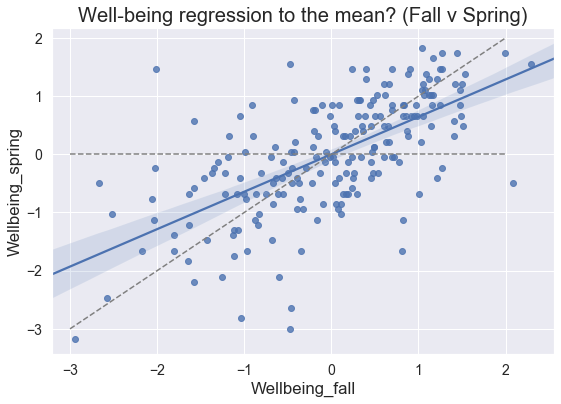

In [19]:
ax = sns.regplot('Wellbeing_fall', 'Wellbeing_spring', data=df)
ax.plot([-3, 2], [-3, 2], color='gray', linestyle='--', scalex=False, scaley=False);
ax.plot([-3, 2], [0, 0], color='gray', linestyle='--', scalex=False, scaley=False);
ax.set_title('Well-being regression to the mean? (Fall v Spring)')

Text(0.5, 1.0, 'Well-being regression to the mean? (Fall v Change)')

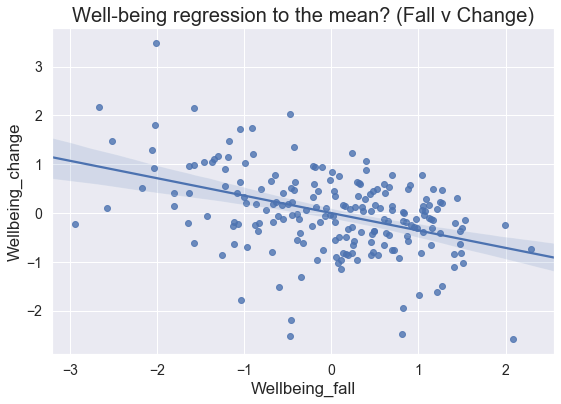

In [20]:
sns.regplot('Wellbeing_fall', 'Wellbeing_change', data=df)
plt.title('Well-being regression to the mean? (Fall v Change)')

#### Drop well-being-change columns, let the models figure out if it matters

In [21]:
df.drop(columns='Wellbeing_change', inplace=True)

## Manually adjust demographic columns

In [22]:
df.head()

,NID,Age,Gender,Race,Major,Rlgn,FinclAid,Born,YearsUS,CtznStatus,Siblings,FatherEd,MotherEd,FmlyIncome,FmlyStatus,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,English,None,No,1.0,18.0,United States citizen,3.0,"Professional Degree (MD, JD, etc.)","Professional Degree (MD, JD, etc.)","$75,000 - $99,999",8.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354
M9obKkDvc0,11.0,18.0,2.0,South Asian,cs/econ,None,Yes,1.0,6.0,United States citizen,1.0,Master's Degree (MS),Master's Degree (MS),Choose not to disclose,10.0,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972
RdS4vMvQjo,9.0,18.0,1.0,White or Caucasian,Undecided,None,Yes,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Doctoral Degree (PhD),"$100,000 - $150,000",8.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411
n08loMfJH7,4.0,18.0,2.0,East Asian,Undecided,None,No,1.0,18.0,United States citizen,1.0,Doctoral Degree (PhD),Vocational/Technical School (2 year),"Over $150,000",9.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565
8rsekwqjFy,5.0,18.0,1.0,South Asian,undecided,Other,Yes,1.0,18.0,United States citizen,1.0,Vocational/Technical School (2 year),Vocational/Technical School (2 year),"$100,000 - $150,000",7.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972


### Remove demographic-like columns that we don't want to use in our models

In [23]:
df.drop(columns=['Major', 'Rlgn', 'YearsUS', 'Siblings', 'CtznStatus', 'Born', 'FmlyStatus'], inplace=True)

### Make parental education numeric/cardinal

In [24]:
mapping = {
    'Doctoral Degree (PhD)': 4,
    'Professional Degree (MD, JD, etc.)': 4,
    'Master\'s Degree (MS)': 3.5,
    'College Graduate (4 year)': 3,
    'Some College ': 2.5,
    'Vocational/Technical School (2 year)': 2.5,
    'High School': 2,
    'Grammar School': 1,
    'Other': None,
}
for col in ['FatherEd', 'MotherEd']:
    df[col] = df[col].map(mapping)
df.head()

,NID,Age,Gender,Race,FinclAid,FatherEd,MotherEd,FmlyIncome,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,No,4.0,4.0,"$75,000 - $99,999",4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354
M9obKkDvc0,11.0,18.0,2.0,South Asian,Yes,3.5,3.5,Choose not to disclose,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972
RdS4vMvQjo,9.0,18.0,1.0,White or Caucasian,Yes,4.0,4.0,"$100,000 - $150,000",3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411
n08loMfJH7,4.0,18.0,2.0,East Asian,No,4.0,2.5,"Over $150,000",4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565
8rsekwqjFy,5.0,18.0,1.0,South Asian,Yes,2.5,2.5,"$100,000 - $150,000",4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972


### Make income numeric/cardinal

In [25]:
mapping = {
    'Under $10,000': 5000,
    '$10,000 - $19,999': 15000,
    '$20,000 - $29,999': 25000,
    '$30,000 - $39,999': 35000,
    '$40,000 - $49,999': 45000,
    '$50,000 - $74,999': 62500,
    '$75,000 - $99,999': 87500,
    '$100,000 - $150,000': 125000,
    'Over $150,000': 200000,
    'Choose not to disclose': None,
}
df['FmlyIncome'] = df['FmlyIncome'].map(mapping)
df.head()

,NID,Age,Gender,Race,FinclAid,FatherEd,MotherEd,FmlyIncome,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,1.0,White or Caucasian,No,4.0,4.0,87500.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354
M9obKkDvc0,11.0,18.0,2.0,South Asian,Yes,3.5,3.5,NaN,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972
RdS4vMvQjo,9.0,18.0,1.0,White or Caucasian,Yes,4.0,4.0,125000.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411
n08loMfJH7,4.0,18.0,2.0,East Asian,No,4.0,2.5,200000.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565
8rsekwqjFy,5.0,18.0,1.0,South Asian,Yes,2.5,2.5,125000.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972


### Gender

In [26]:
df['Gender'] = df['Gender'].map({
    1: 'M',
    2: 'F',
    -999: 'other'
})
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,NID,Age,Race,FinclAid,FatherEd,MotherEd,FmlyIncome,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Gender_M,Gender_other
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,White or Caucasian,No,4.0,4.0,87500.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354,1,0
M9obKkDvc0,11.0,18.0,South Asian,Yes,3.5,3.5,NaN,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972,0,0
RdS4vMvQjo,9.0,18.0,White or Caucasian,Yes,4.0,4.0,125000.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411,1,0
n08loMfJH7,4.0,18.0,East Asian,No,4.0,2.5,200000.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565,0,0
8rsekwqjFy,5.0,18.0,South Asian,Yes,2.5,2.5,125000.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972,1,0


### Financial aid

In [28]:
df['FinclAid'] = df['FinclAid'].apply(lambda x: None if pd.isnull(x) else int(x == 'Yes'))

### Race

In [27]:
df['Race'].value_counts()

East Asian                                                 60
White or Caucasian                                         38
Hispanic or Latino/a                                       18
Black or African American                                  16
South Asian                                                12
White or Caucasian,Hispanic or Latino/a                    11
East Asian,White or Caucasian                               8
White or Caucasian,Middle Eastern                           5
Other                                                       5
Black or African American,White or Caucasian                5
East Asian,South Asian                                      3
Pacific Islander,White or Caucasian                         2
Pacific Islander                                            2
Black or African American,Hispanic or Latino/a              2
American Indian,White or Caucasian                          1
American Indian,White or Caucasian,Hispanic or Latino/a     1
East Asi

In [ ]:
def map_race(race):
    if pd.isnull(race):
        return None
    if ',' in race:
        return 'Mixed'
df['Race'] = df['Race'].apply(lambda x: None if pd.isnull(x) else x.split(','))

In [27]:
df['Race'] = df['Race'].apply(lambda x: [] if pd.isnull(x) else x.split(','))
unique_races = set()
for races in df['Race']:
    for r in races:
        unique_races.add(r)
unique_races

{'American Indian',
 'Black or African American',
 'East Asian',
 'Hispanic or Latino/a',
 'Middle Eastern',
 'Other',
 'Pacific Islander',
 'South Asian',
 'White or Caucasian'}

In [28]:
for r in unique_races:
    df[f'Race_{r}'] = df['Race'].apply(lambda x: r in x).astype(int)
df.drop(columns=['Race'], inplace=True)
df.head()

,NID,Age,FinclAid,FatherEd,MotherEd,FmlyIncome,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Gender_M,Gender_other,Race_Black or African American,Race_Pacific Islander,Race_Other,Race_American Indian,Race_Hispanic or Latino/a,Race_South Asian,Race_Middle Eastern,Race_East Asian,Race_White or Caucasian
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,No,4.0,4.0,87500.0,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354,1,0,0,0,0,0,0,0,0,0,1
M9obKkDvc0,11.0,18.0,Yes,3.5,3.5,NaN,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972,0,0,0,0,0,0,0,1,0,0,0
RdS4vMvQjo,9.0,18.0,Yes,4.0,4.0,125000.0,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411,1,0,0,0,0,0,0,0,0,0,1
n08loMfJH7,4.0,18.0,No,4.0,2.5,200000.0,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565,0,0,0,0,0,0,0,0,0,1,0
8rsekwqjFy,5.0,18.0,Yes,2.5,2.5,125000.0,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972,1,0,0,0,0,0,0,1,0,0,0


In [29]:
df[[c for c in df.columns if c.startswith('Race')]].sum(axis=1).value_counts().sort_index()

0      2
1    152
2     45
3      5
dtype: int64

## Impute the (small amount of) missing data

### How much data is missing? (A: Not much)

In [31]:
df.isnull().mean()

NID                               0.000000
Age                               0.000000
FinclAid                          0.009804
FatherEd                          0.014706
MotherEd                          0.009804
FmlyIncome                        0.127451
Extraversion                      0.000000
Agreeableness                     0.000000
Openness                          0.000000
Conscientiousness                 0.000000
NPI                               0.000000
Positive_empathy                  0.000000
Pos_efficacy                      0.000000
Neg_efficacy                      0.000000
Pos_tendency                      0.000000
Neg_Tendency                      0.000000
Need_Belong                       0.000000
Prosociality                      0.000000
Emp_theory                        0.000000
RS_1                              0.014706
RS_2                              0.014706
Self_Esteem                       0.000000
Self_monitor                      0.000000
Distress_Di

In [32]:
for c in df.columns:
    n_missing = df[c].isnull().sum()
    if n_missing > 0:
        print('Imputing %d (of %d) missing values for %s with the global mean' % (
            n_missing, len(df), c))
        df[c].fillna(df[c].mean(), inplace=True)

Imputing 2 (of 204) missing values for FinclAid with the global mean
Imputing 3 (of 204) missing values for FatherEd with the global mean
Imputing 2 (of 204) missing values for MotherEd with the global mean
Imputing 26 (of 204) missing values for FmlyIncome with the global mean
Imputing 3 (of 204) missing values for RS_1 with the global mean
Imputing 3 (of 204) missing values for RS_2 with the global mean


In [33]:
df.head()

,NID,Age,FinclAid,FatherEd,MotherEd,FmlyIncome,Extraversion,Agreeableness,Openness,Conscientiousness,NPI,Positive_empathy,Pos_efficacy,Neg_efficacy,Pos_tendency,Neg_Tendency,Need_Belong,Prosociality,Emp_theory,RS_1,RS_2,Self_Esteem,Self_monitor,Distress_Disclosure,Guidance,Warmth,Integration,Attachment,Nurturance,Reliable,Anticipated_Risks,Anticipated_Benefits,PI,SI,CI,BFNE,BAS_drive,BAS_Fun_seeking,BAS_Fun_Reward_responsiveness,Suppression,Cogntive_Reappraisal,Extensic_improve,Extensic_worse,Intrinsic_imrpove,Intrinsic_worse,Empathic_Concern,Perspective_Taking,Personal_Distress,Wellbeing_fall,Wellbeing_spring,Gender_M,Gender_other,Race_Black or African American,Race_Pacific Islander,Race_Other,Race_American Indian,Race_Hispanic or Latino/a,Race_South Asian,Race_Middle Eastern,Race_East Asian,Race_White or Caucasian
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vgxlTMkQs5,7.0,18.0,0.0,4.0,4.0,87500.000000,4.0,4.0,5.5,3.5,3.333333,4.142857,6.75,5.25,4.25,2.75,3.8,2.666667,3.000000,4.750,4.000,3.1,19.0,2.785714,2.50,3.5,2.5,2.00,2.75,2.50,4.75,4.00,4.000000,3.25,1.375,3.857143,2.25,2.0,3.2,6.00,3.166667,4.833333,1.0,2.000000,4.50,2.166667,1.857143,1.428571,-2.063548,-0.765354,1,0,0,0,0,0,0,0,0,0,1
M9obKkDvc0,11.0,18.0,1.0,3.5,3.5,115856.741573,6.0,4.5,5.0,4.5,5.000000,4.000000,6.50,6.25,7.00,6.50,3.8,4.000000,3.000000,5.625,5.625,2.2,14.0,3.571429,2.50,2.5,2.5,2.50,2.50,2.50,4.00,4.00,4.000000,4.00,4.000,5.000000,4.00,4.0,4.0,7.00,7.000000,5.000000,5.0,5.000000,5.00,2.833333,2.571429,2.000000,-0.011434,-0.049972,0,0,0,0,0,0,0,1,0,0,0
RdS4vMvQjo,9.0,18.0,1.0,4.0,4.0,125000.000000,3.0,6.0,6.5,5.0,2.533333,3.142857,4.75,5.75,4.50,4.00,3.6,2.750000,3.166667,3.375,4.000,1.8,10.0,2.571429,4.00,3.0,3.5,2.75,2.25,4.00,3.75,3.25,3.833333,2.75,2.500,1.857143,2.00,3.0,2.8,2.25,4.666667,2.166667,1.0,2.666667,1.00,2.500000,2.142857,1.285714,0.919656,0.665411,1,0,0,0,0,0,0,0,0,0,1
n08loMfJH7,4.0,18.0,0.0,4.0,2.5,200000.000000,4.0,5.5,6.5,5.5,3.000000,3.714286,5.25,5.75,4.50,4.25,3.6,3.000000,3.333333,4.750,3.875,2.0,13.0,2.285714,2.75,3.0,3.0,3.00,2.75,3.25,4.25,3.50,4.166667,3.50,3.000,2.857143,3.25,3.0,3.4,3.25,4.833333,3.000000,1.0,2.500000,1.25,2.833333,2.142857,0.857143,0.653420,0.486565,0,0,0,0,0,0,0,0,0,1,0
8rsekwqjFy,5.0,18.0,1.0,2.5,2.5,125000.000000,4.5,5.0,6.0,5.0,2.800000,4.000000,6.75,6.25,4.75,4.00,3.7,2.666667,3.666667,3.500,4.875,1.8,18.0,2.571429,3.50,3.0,3.5,3.00,3.00,3.00,4.00,3.50,4.333333,2.50,3.000,2.000000,3.00,3.5,3.8,4.25,5.166667,4.333333,1.0,4.000000,1.25,2.666667,2.142857,2.000000,0.698392,-0.049972,1,0,0,0,0,0,0,1,0,0,0


In [35]:
df.to_csv(FINAL_DATAFILE, index=True)